### Preprocessing tutorial

As when we get the data from the needed part, some basic use case of machine learning like classification or regression by some traditional machine learning algorithm always really sensitive with the input data also called training data. so the training data distribution really matters for algorithm. But what are the common way to process the data? In fact, there just a few method that we could use to process the data. I will show you one by one with the common step.

#### Tips:
Whole sklearn prepreprocessing step both could be used first use the 'fit' function for data, and 'transform' function to convert the data to what we want.

Here we go.

In [2]:
# first to import the used module
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, MaxAbsScaler, OneHotEncoder, PolynomialFeatures, LabelEncoder
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# I don't want to see any warning info
warnings.simplefilter('ignore')

x, _ = load_iris(return_X_y = True)

# as we couldn't use the np.random.randn() function as this function will random the data with the standard normal distribution
# x = np.random.randn(1000, 4)
# x = np.random.random_sample((10000, 4))   # this is also normal distribution
# x =np.random.random((10000, 4))

### 1. StandardScaler(标准化)

The first is most common of the preprocessing step as the standard the data. The standard of the data is to convert the data to be a gaussian distribution aka normal distribution(what is a normal distribution? think about I told you with the height of person, few people with too tall or to short, most people with normal height, this is normal distribution), but how to convert the data to be a normal? Really easy, given you a dataset with A as a np.ndarray, then just use the standard function will convert the data to be normal: (x - x.mean(axis=0)) / x.std(axis=0), axis = 0 means with each column with mean or others, I will show you for this, and the mean means the avarage data, std() means the standard deviation of the data(标准差：方差的根号), used most in machine learning.

Here I will use the sklearn also with the pure python implement of the Standard function.

In [53]:
# get the orginal data
x[:4, :]    # get first 4th row and whole columns

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [54]:
# init the Standard object 
scaler = StandardScaler(with_mean=True, with_std=True)

# fit the scaler model
scaler.fit(x)

# convert the data to be normal distribution.
x_scaled = scaler.transform(x)

# original info
print("original data mean:", x.mean(axis=0))
print("original data std: ", x.std(axis=0))

# converted data info, should be 0 mena and 1 std
print("after mean: ", x_scaled.mean(axis=0))

print('afer standard divation:', x_scaled.std(axis=0))

original data mean: [5.84333333 3.054      3.75866667 1.19866667]
original data std:  [0.82530129 0.43214658 1.75852918 0.76061262]
after mean:  [-1.69031455e-15 -1.63702385e-15 -1.48251781e-15 -1.62314606e-15]
afer standard divation: [1. 1. 1. 1.]


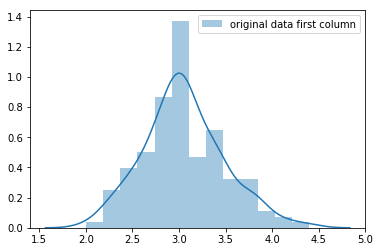

In [55]:
# histgram, distribution(probability)
sns.distplot(x[:, 1], label='original data first column')
plt.legend()
plt.show()

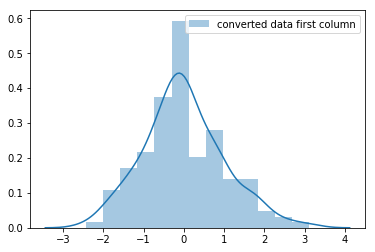

In [56]:
sns.distplot(x_scaled[:, 1],label='converted data first column')
plt.legend()
plt.show()

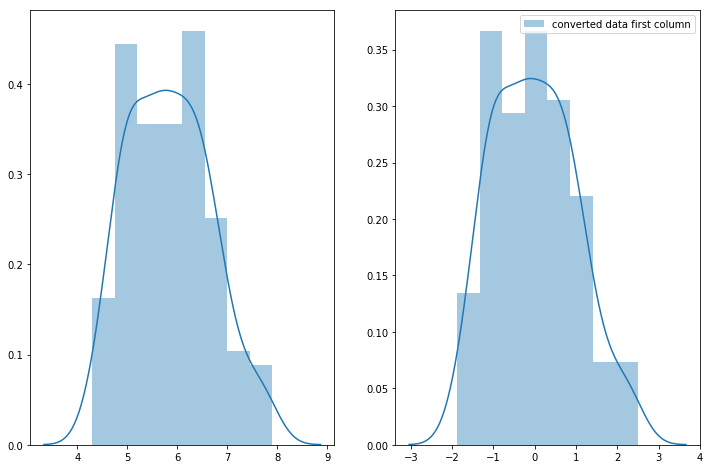

In [58]:
# you may wonder is that true the data has been converted with mean 0 and std with 1? How to check the most 
# effecient way is to plot the distribution of the data
# I will show you with the original distribution and transferred data distribution with first column(as the convert 
# step is based on the columns side means that whole transferred data columns are with mean 0 and std 1, you could check that)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))

# orginal data distribution
sns.distplot(x[:, 0], ax=ax[0], label='original data first column')

sns.distplot(x_scaled[:, 0], ax=ax[1], label='converted data first column')

plt.legend()
plt.show()

# Tips: although this data is like with each other both like the normal distribution! But for in real life, not this case!!! 
# so you should standard the data first if you want to use LogisticRegression or SVM

In [59]:
# Here I just want to show you that the sklearn result is same with manually computing result
x_scaled_manual = (x - x.mean(axis=0)) / x.std(axis=0)

print("whether they are all close?", np.allclose(x_scaled, x_scaled_manual))

whether they are all close? True


### 2. MinMaxScaler(归一化)

Sometimes the features are really different scale with size like one column range from 1 to 10, the other column range is from 10 to 100000, so you shouldn't just put the data into your model!!! you have to process this data, the common way is to process the data to let the data lie between 0 to 1, so the volumn shouldn't affect the training step. 

But how to do the MinMax? easy, use this function: (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))! so the data will be between 0 and 1.

In [6]:
min_scaler = MinMaxScaler(feature_range=(0, 1))

# fit model
min_scaler.fit(x)

x_min = min_scaler.transform(x)

# orgignal data info
print("original data min with columns:", x.min(axis=0))
print("original data max with columns:", x.max(axis=0))

# converted data info
print("transformed data min with columns:", x_min.min(axis=0))
print("transformed data max with columns:", x_min.max(axis=0))

# you could see that for the converted data min is 0 and max is 1

original data min with columns: [4.3 2.  1.  0.1]
original data max with columns: [7.9 4.4 6.9 2.5]
transformed data min with columns: [0. 0. 0. 0.]
transformed data max with columns: [1. 1. 1. 1.]


In [61]:
# Here I show you the manual step with up function
x_min_manual = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))

print("whether they are all close?", np.allclose(x_min, x_min_manual))

whether they are all close? True


In [64]:
# in fact, there is also another feature tranformation that we could use is to convert the data from 0 to 1
# but this is just to divede the data with the max absolutely data of each column
# just use the MaxAbsScaler
max_scaler = MaxAbsScaler()

max_scaler.fit(x)

x_max = max_scaler.transform(x)

print("transformed data max with columns:", x_max.min(axis=0))
print("transformed data max with columns:", x_max.max(axis=0))

transformed data max with columns: [0.5443038  0.45454545 0.14492754 0.04      ]
transformed data max with columns: [1. 1. 1. 1.]


In [65]:
# manually check
x_max_manual = x / np.abs(x.max(axis=0))

print("whether they are all close?", np.allclose(x_max, x_max_manual))

whether they are all close? True


### 3.Normalization

Some times we want to make the data devided by the norm of data, like l2-norm and l1-norm, after the transformation, then the data will be with the same scale with each columns means Normalize samples individually to unit norm. About what is l2-norm is: ||x||**2 and l1-norm is ||x||.

But how to compute the normalization? with this function:  x / norm(x, axis=1)

In [70]:
norm = Normalizer(norm='l2')

norm.fit(x)

x_norm = norm.transform(x)

# manually check
x_norm_manual = x / np.linalg.norm(x, ord=2, axis=1)[:, np.newaxis]

print("whether they are all close?", np.allclose(x_norm, x_norm_manual))

whether they are all close? True


### 4. OnehotEncoding

Sometimes we would face the problem that for the feature are some categorical string, like city columns: 'Dalian', 'Dadong',...
you have to know that machine learning couldn't accept the string type except the tree algorithm, but you should convert the string to numbers will be a better solution.

But what is one-hot encoding? assume you have to distinct value as city: 'dalian' and 'dandong', you could convert this column to another 2 columns with [1, 0] means 'dalian' and [0, 1] means 'dadong'. so if you have n distinct value in one column, then y ou will get n-D new columns. 1 means exits, 0 means not exits.

In [8]:
feature_col = ['dalian', 'dadong', 'shenyang', 'donggang', 'kuandian']

# as we couldn't direct pass string to One-Hot, we have to convert the string to number using the LabelEncoder first.
lab_enc = LabelEncoder()

lab_enc.fit(feature_col)

# Label encoder will convert the unique data to be continous value, 
# like this will make 'dalian' to 1, 'dandong' to 0 and 'shenyang' to 2 
num_fea = lab_enc.transform(feature_col)
print('original data is: ', feature_col)
print('converted vector is: ', num_fea)

# Here is onehot
enc = OneHotEncoder()

num_fea = num_fea.reshape(-1, 1)

enc.fit(num_fea)

enc_vector = enc.transform(num_fea)

# Onehot encoder will convert the data to be each column just one 1 and others as 0, 1 means that position should be the index
# if you still don't understand this, you could just ask me for help~ I will tell you~
print('original data is: ', num_fea)
print('converted vector is: ')
enc_vector.todense()

original data is:  ['dalian', 'dadong', 'shenyang', 'donggang', 'kuandian']
converted vector is:  [1 0 4 2 3]
original data is:  [[1]
 [0]
 [4]
 [2]
 [3]]
converted vector is: 


matrix([[0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.]])

### 5.Polynomial

Sometimes the data isn't linear seperatable, so if we use the linear model like LinearRegression or LogisticRegression, we couldn't get a better result as there isn't a perfect line to seperate the data, so is there a solution for this? In fact, to solve this problem, we have two solution: one is to convert the data to be a higher dimension, so that the linear model could seperate the new created data in a higher dimension space; second solution is to use the non-linear model like SVM. Polynomial is used as the first solution: convert the data to be a higher dimension!

But how to make the data to be a higher dimension? there are many ways to do this, but the polynomial solution takes the easies one, just make the data with higher convertion like this: given two features x1 and x2, then if we converted the data to be 3D like just add one feature with x1*x2, then you know that your feature space is bigger than before, then the linear seperatable chance is bigger than before(not means must be seperatable!). 

So polynomail algorithm most important parameter is the 'degree', here just assume you have two features x1 and x2, then if you set the 'degree'=2, then new converted data will be 6D, the new converted data is computed with: `1`, `x1`, `x2`, `x1*x2`, `x1**2`, `x2**2`.

Here I will show you.

In [12]:
poly = PolynomialFeatures(degree=2)

# here data is 2D
x = np.random.randn(10, 2)

poly.fit(x)

# convert the data 
x_poly = poly.transform(x)

# get the info
print("original data dimension: ", x.shape[1])
print('converted data dimension(should be 6):', x_poly.shape[1])

original data dimension:  2
converted data dimension(should be 6): 6


### Final practice

Above all the feature preprocessing steps are used most during my work, so you could just know the whole above algorithm is enough! So you could even don't need to read the sklearn official preprocossing web, but if you want to know more, you could also get the web with this link: [sklearn preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)

Bellow I will show you the necessary of preprocessing step, just for testing! But you should do preprocessing step during your machine learning model building step!

In [14]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

x, y = load_iris(return_X_y=True)

# as the original data is normal distribution, so I just add more noise to the data!
noise = np.random.randint(1, 10, size=x.shape)

x_new = x + noise

lr = LogisticRegression()

# start to fit the noise data
lr.fit(x_new, y)

# only 51% accuracy, so bad...
print('score of noise data:', lr.score(x_new, y))

score of noise data: 0.5466666666666666


In [15]:
# Here I will use first to convert the data with Standard
# I could even not create the Standard object, just use the object `fit_tranform` method, also fine.
x_new_scale = StandardScaler(with_mean=True, with_std=True).fit_transform(x_new)


# retrain the model
lr.fit(x_new_scale, y)

# so you find the accuracy improve a little
print("with standard accuracy: ", lr.score(x_new_scale, y))

(150, 4)
with standard accuracy:  0.5733333333333334


In [93]:
# with MinMaxscaler to make the data to be 0 to 1
x_new_min = MinMaxScaler(feature_range=(0, 1)).fit_transform(x)

lr.fit(x_new_min, y)

# so greate improve!!! with 84%
print("with MinMax accuracy: ", lr.score(x_new_min, y))

with MinMax accuracy:  0.8466666666666667


In [94]:
# with the MaxAbsScaler to divide with max value
x_new_max = MaxAbsScaler().fit_transform(x)

lr.fit(x_new_max, y)

# get 86% acccuray, even better
print("with MaxAbs accuracy: ", lr.score(x_new_max, y))

with MaxAbs accuracy:  0.86


In [95]:
# with polynomial degree with 2
x_new_poly = PolynomialFeatures(degree=2).fit_transform(x)

lr.fit(x_new_poly, y)

# you see? 98% accuray! best accuracy for now!
print("with poly accuracy: ", lr.score(x_new_poly, y))

with poly accuracy:  0.98


### Final words

As you could see that the preprocessing is really important during the model training step, then you could get a really better accuracy with your step, but one thing to notice that you have to know that with feature processing doesn't means will improve your score definitely! But the machine learning training step contains the feature engineering step as most important part!

So I just first finish the first part for the preprocessing part. If you have any other problem, just reach me~~~